### 1. Loading Data

In [1]:
supercon_data <- read.csv('./dataset/train.csv')
supercon_unique <- read.csv('./dataset/unique_m.csv')

In [2]:
head(supercon_data,5)

number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
4,88.94447,57.86269,66.36159,36.11661,1.181795,1.0623955,122.9061,31.79492,51.96883,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.4330127,0.4370588,29
5,92.72921,58.51842,73.13279,36.39660,1.449309,1.0577551,122.9061,36.16194,47.09463,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.6324555,0.4686063,26
4,88.94447,57.88524,66.36159,36.12251,1.181795,0.9759805,122.9061,35.74110,51.96883,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.4330127,0.4446966,19
4,88.94447,57.87397,66.36159,36.11956,1.181795,1.0222909,122.9061,33.76801,51.96883,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.4330127,0.4409521,22
4,88.94447,57.84014,66.36159,36.11072,1.181795,1.1292237,122.9061,27.84874,51.96883,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.4330127,0.4288095,23


In [3]:
#check for missing values: - No missing values
sapply(supercon_data, function(x) sum(is.na(x)))[sapply(supercon_data, function(x) sum(is.na(x)))>0]

named integer(0)

### 2. Data Cleaning

### 3. Correlation Analysis

In [39]:
library(corrplot)

corrplot 0.84 loaded


In [76]:
library(dplyr)
library(caret)

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


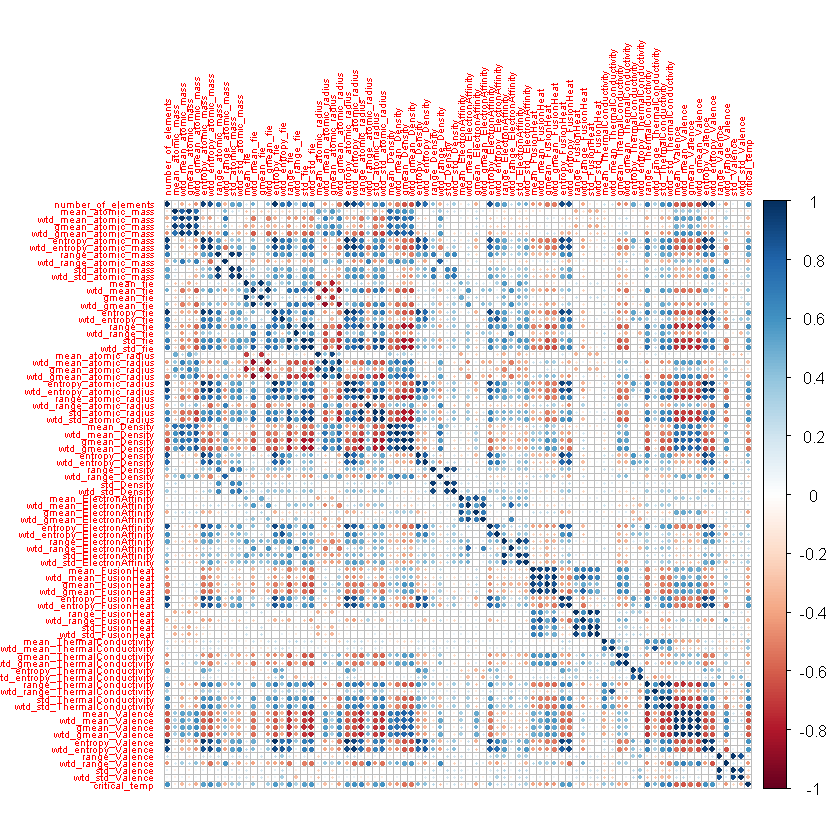

In [50]:
# Correlation plot - High Correlation among variables
# It can be seen that high correlation exists!
correlations <- cor(supercon_data)
corrplot(correlations, method="circle",tl.cex=0.5)

In [84]:
cor_matrix = cor(supercon_data)
cor_matrix[1:5,1:5] #glimpse of the correlation matrix created

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass
number_of_elements,1.0000000,-0.1419228,-0.3530644,-0.2929688,-0.4545251
mean_atomic_mass,-0.1419228,1.0000000,0.8159770,0.9402982,0.7458406
wtd_mean_atomic_mass,-0.3530644,0.8159770,1.0000000,0.8482415,0.9640851
gmean_atomic_mass,-0.2929688,0.9402982,0.8482415,1.0000000,0.8569754
wtd_gmean_atomic_mass,-0.4545251,0.7458406,0.9640851,0.8569754,1.0000000


In [85]:
drop = findCorrelation(cor_matrix, cutoff = .6)
drop = names(supercon_data)[drop]
supercon_data_corr_rem = supercon_data[ , !(names(supercon_data) %in% drop)]

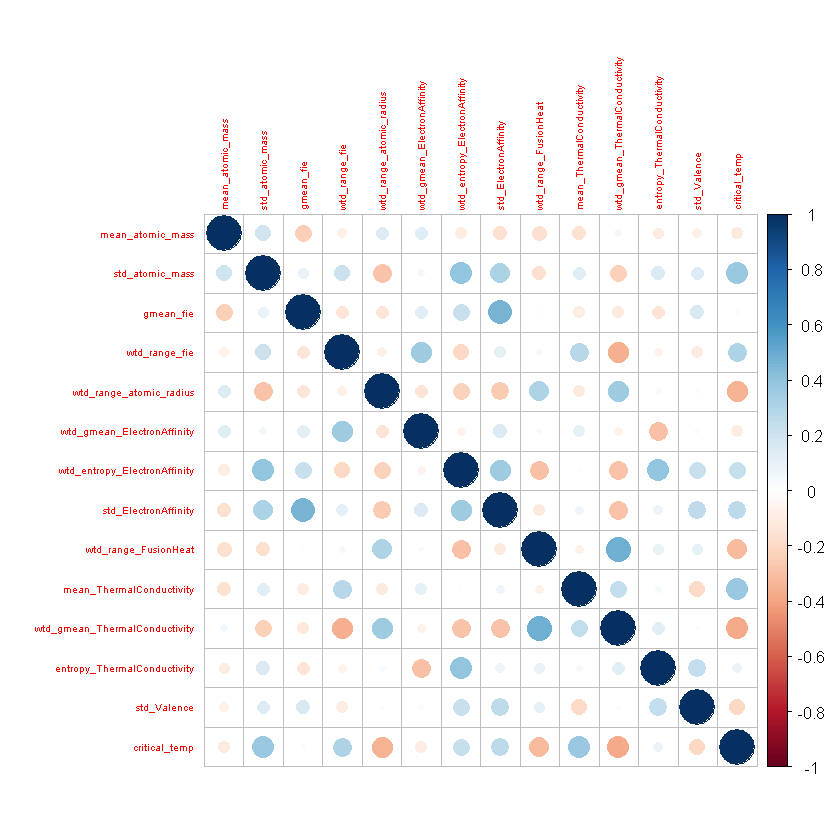

In [86]:
correlations <- cor(supercon_data_corr_rem)
corrplot(correlations, method="circle",tl.cex=0.5)

In [92]:
#Getting the highly correlated variable groups for better explainability
row_col_mat = which(cor_matrix>=0.6, arr.ind=TRUE)
rc_df = as.data.frame(row_col_mat)
correlated_var_groups = rc_df %>% group_by(row) %>% 
summarize(col = paste(sort(unique(col)),collapse=", "))

## First Cut Model Creation

In [95]:
model<-lm(critical_temp~.,data=supercon_data_corr_rem)
summary(model)


Call:
lm(formula = critical_temp ~ ., data = supercon_data_corr_rem)

Residuals:
    Min      1Q  Median      3Q     Max 
-81.211 -17.230  -2.063  16.504 210.902 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    35.536230   2.327105  15.271  < 2e-16 ***
mean_atomic_mass               -0.036419   0.007005  -5.199 2.03e-07 ***
std_atomic_mass                 0.330743   0.010807  30.605  < 2e-16 ***
gmean_fie                      -0.027088   0.002639 -10.265  < 2e-16 ***
wtd_range_fie                   0.013451   0.001138  11.820  < 2e-16 ***
wtd_range_atomic_radius        -0.124348   0.005581 -22.281  < 2e-16 ***
wtd_gmean_ElectronAffinity     -0.242761   0.006416 -37.840  < 2e-16 ***
wtd_entropy_ElectronAffinity    4.629387   0.878547   5.269 1.38e-07 ***
std_ElectronAffinity            0.223585   0.009760  22.909  < 2e-16 ***
wtd_range_FusionHeat           -0.091956   0.018959  -4.850 1.24e-06 ***
mean_ThermalConduc